# Сборный проект
**Цель работы**:  для интернет-магазина "СТримчик" провести анаиз данных с целью определения потенциально выгодных продуктов и направлений и дать соответствующие рекомендации.

**Поставленные задачи**:
1. Провести предобработку данных с целью "чистки" их для дальнейшей работы.
2. Провести Исследовательский анализ данных, в котором необходимо будет определить:
   - какая граница по годам является критичекой, какой вид зависимости суммы продаж от лет имеет, если ли пики и как они обьяснябтся.
   - лидеров продаж с платформ. Найти среднюю продолжительность жизни платформы.
   - благоприятный период для анализа и прогнозирования для 2017 г.
   - какие платформы являются перспективными, а какие нет. Что наблюдаются в распределении.
   - какие платформы продают больше всего.
   - есть ли влияние оценок пользователей и критиков от продаж.
   - какие лучше всего продаются игры в зависимости от жанров.
3. Исходя их трех регионов(Северная Америка, Европа, Япония):
   - определить топ 5 популярных платформ в зависимости от региона.
   - выявить топ 5 жанров и есть ли различия в зависимости от страны пользователя.
   - есть ли влияние рейтинга ESRB на продажи для регионов.
4. Для дальнейшего развития бинзеса необходимо проверить ряд гипотез:
   - средние пользовательские рейтинги платформ XOne и PC одинаковые.
   - средние пользовательские рейтинги жанров Action и Sports разные.


## Первичное знакомство с данными
На данном этапе необходимо:
1. Импортировать необходимые библиотеки
2. Прочитать файл, сохранив его в переменной data
3. Вывести на экран первые 20 строк файла
4. Вывести информацию из файла
5. Сделать вывод о полученных данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Вывод.
После загрузки данных и первичного просмотра файла было установлено, что:
1. Необходимо поменять названия столбцов.
2. Проверить на уникальность категориальные данные, если будут дубликаты - провести замену.
3. Изменить тип данных на int у столбца year_of_release
4. Проверить на пропуски данные, если они есть, устранить их (если есть такая возможность).
5. Посмотреть есть ли дубикаты строк, если они есть, удалить их.
6. Изменить тип данных на float у столбца User_Score

## Предобработка данных
На данном этапе необходимо провести "чистку" данных для дальнейшей работы с ними.
Для этого необходимо реализовать все пункты из вывода по пункту 1.

### Исправление названия столбцов

In [5]:
print (data.columns) 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [6]:
data.columns = data.columns.str.lower()
data = data.rename(columns ={'year_of_release' : 'year'})
display(data.head(10))#проверка

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Определение пропусков и дубликатов строк

In [7]:
print(data.isna().sum())

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64


In [8]:
print(data.shape[0])
print(data.duplicated().sum())

16715
0


In [9]:
print('Количество неявных дубликатов по имени, платформе и дате одновременно :',data[['name','platform', 'year']].duplicated().sum())

Количество неявных дубликатов по имени, платформе и дате одновременно : 2


Поскольку неявнух дубликатов было выявлено 2, их можно удалить. Проведем удаление дубликатов, затем повторно проверим, остались ли они ещё

In [10]:
data = data.drop_duplicates(subset = ['name','platform', 'year'])
print('Количество неявных дубликатов по имени, платформе и дате одновременно после удаления:',data[['name','platform', 'year']].duplicated().sum())

Количество неявных дубликатов по имени, платформе и дате одновременно после удаления: 0


### Исследование на пропуски и дубликаты для столбцов  "name" и "genre"

In [11]:
print(data['name'].unique())
display(data[data['name'].isna()])

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [12]:
print('Количество строк до удаления :', data.shape[0])
data = data.dropna(subset = ['name'])
print('Количество строк после удаления :', data.shape[0])

Количество строк до удаления : 16713
Количество строк после удаления : 16712


### Исследование на дубликаты столбца "platform"

In [13]:
print (data['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [14]:
print('Дубликатов в столбце "platform" нет')

Дубликатов в столбце "platform" нет


### Исследование на пропуски и дубликаты столбца "year"

In [15]:
print (data['year'].unique())
print('Количество пропущенных значений в столбце year :',data['year'].isna().sum())
print ('Процент незаполненных лет по отношению по всему количеству лет',round(data['year'].isna().sum() / data.shape[0]* 100,1))

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Количество пропущенных значений в столбце year : 269
Процент незаполненных лет по отношению по всему количеству лет 1.6


In [16]:
print('Количество строк до удаления :', data.shape[0])
data = data.dropna(subset = ['year'])
print('Количество строк после удаления :', data.shape[0])

Количество строк до удаления : 16712
Количество строк после удаления : 16443


In [17]:
data['year'] = data['year'].astype(int)

### Исследование на пропуски столбца "rating"

In [18]:
data['rating'] = data['rating'].fillna('unknown')
#display(data.query('rating == "unknown"').head(20))

### Исследование на пропуски столбца "critic_score"

In [19]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [20]:
data['critic_score'] = data['critic_score'].astype(int)

### Исследование на пропуски столбца "user_score"

In [21]:
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype('float')
data['user_score'] = data['user_score'].fillna(-1)

### Добавление столбца с общей суммой продаж

In [22]:
data['all_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head(10))

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,unknown,28.31


### Проверка пропусков и дубликатов после обработки

In [23]:
print(data.isna().sum())

name            0
platform        0
year            0
genre           0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
critic_score    0
user_score      0
rating          0
all_sum         0
dtype: int64


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16443 non-null  object 
 1   platform      16443 non-null  object 
 2   year          16443 non-null  int64  
 3   genre         16443 non-null  object 
 4   na_sales      16443 non-null  float64
 5   eu_sales      16443 non-null  float64
 6   jp_sales      16443 non-null  float64
 7   other_sales   16443 non-null  float64
 8   critic_score  16443 non-null  int64  
 9   user_score    16443 non-null  float64
 10  rating        16443 non-null  object 
 11  all_sum       16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None


In [25]:
print(data.shape[0])
print(data.duplicated().sum())

16443
0


### Вывод
Была совершена преодобработка данных. В ходе работ было сделано:
1. Удалены две строки дубликатами в столбцах "name" и "genre"
2. Были удалены неявные дубликаты одновременно для столбцов platform, year, name.
3. Было удалено 269 строк, где были неизвестные значения в столбце "year", поскольку данного количество строк составляет 1.6% от всего количества строк. Также был изменен тип данных на int.
4. В столбце "rating" неопределенные данные были заменены на "unknown"
5. В столбце "critic_score" было принято решение поставить заглушку (-1). Также был изменен тип данных на int.
6. В столбце "user_score" данные с значением "tbd" были заменены на nan. Дальше для значений nan, как в п.4., были поставлены заглушки(-1).
7. Был добавлен столбец "all_sum", который считает сумму от всей выручки. Данный столбец был добавлен для дальнейшего использования в анализе данных.

Большое количество пропусков в оценке критиков и оценке пользователей могут быть связаны с низкими продажами, что в последствии привело к нехватке отзывов для получения оценки. А пропуски в рейтинге могут быть обусловлены отсутсвием самого рейтинга и оценка по другому рейтингу.

## Исследовательский анализ данных

Необходимо установить:
1. Какая граница по годам является критичекой, какой вид зависимости суммы продаж от лет имеет, если ли пики и как они обьяснябтся.
2. Определить лидеры продаж с платформ. Найти среднюю продолжительность жизни платформы.
3. Определить благоприятный период для анализа и прогнозирования для 2017 г.
4. Какие платформы являются перспективными, а какие нет. Что наблюдаются в распределении.
5. Какие платформы продают больше всего.
6. Есть ли влияние оценок пользователей и критиков от продаж.
7. Какие лучше всего продаются игры в зависимости от жанров.

### Определение зависимости количества игр от года выпуска.

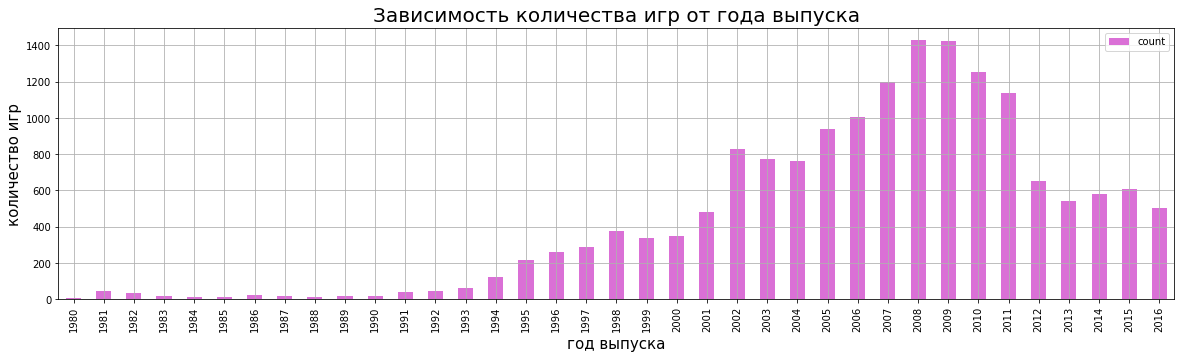

In [27]:
count_game = data.pivot_table(index ='year', values ='name', aggfunc ='count')
count_game.columns = ['count']
count_game.plot(kind = 'bar', grid = True, alpha = 1,figsize=(20, 5), color = 'orchid' )
plt.title('Зависимость количества игр от года выпуска', fontsize=20);
plt.xlabel('год выпуска', fontsize=15);
plt.ylabel('количество игр',fontsize=15);

#### Вывод
Исходя из полученных данных видно, что до 1995 года данные можно не включать в анализ, они имеют значение меньше 200 (неактуальность игр наблюдается). До 2008 набоюдается рост продаж, после 2009 - спад. Спад объясняется финансовым кризисом, усложнением мировых отношений. 

### Определение время жизни платформы

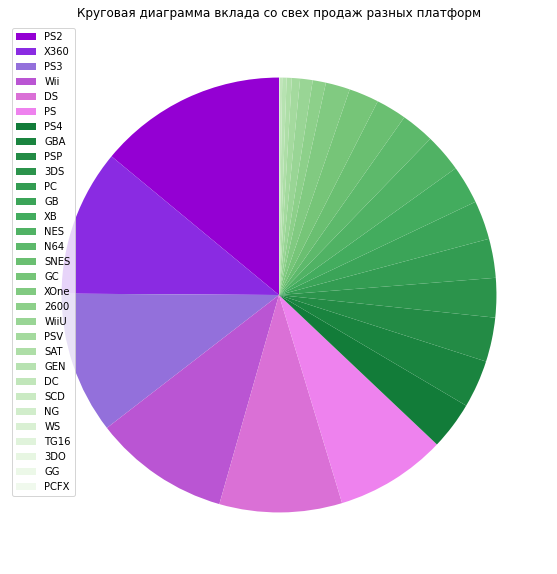

In [28]:
platf_max = data.pivot_table(index = 'platform', values = 'all_sum', aggfunc = 'sum').sort_values(by = 'all_sum', ascending = False)

cmap = plt.get_cmap('Greens')
colors = list(cmap(np.linspace(1.0, 0.05, 31)))

colors[0] = 'darkviolet'
colors[1] = 'blueviolet'
colors[2] = 'mediumpurple'
colors[3] = 'mediumorchid'
colors[4] = 'orchid'
colors[5] = 'violet'

platf_max.plot(
    kind = 'pie',subplots=True,colors=colors , startangle=90,figsize=(10, 10), labeldistance=None);
plt.xlabel("")
plt.ylabel("")
plt.title('Круговая диаграмма вклада со свех продаж разных платформ')
plt.show()

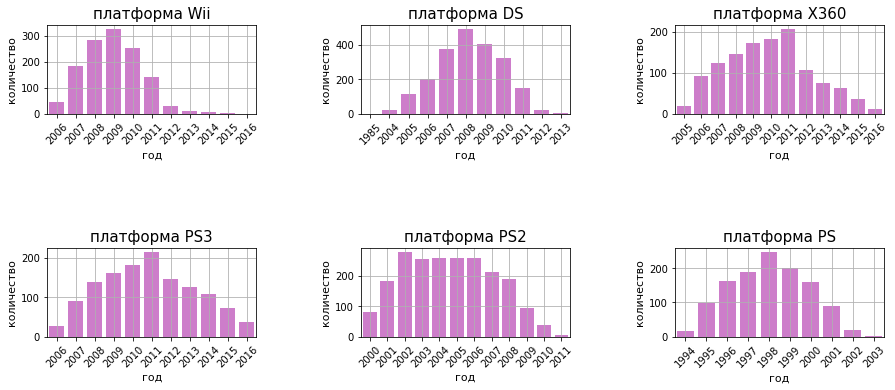

In [29]:
position = 0
plt.figure(figsize=[15,100])
plt.subplots_adjust(wspace=0.5, hspace=1.5)

plat = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']
d = data.query('platform in @plat')

for pl in d['platform'].unique():
    position += 1
    plt.subplot(25, 3, position)
    dt = d[d['platform'] == pl].pivot_table(index = 'year', values = 'name', aggfunc = 'count').reset_index()
    sns.barplot(x='year', y='name', data=dt, color = 'orchid')
    plt.grid(b=True)
    plt.title(f'платформа {pl}', fontsize=15);
    plt.xlabel('год', fontsize=11)
    plt.xticks(rotation=45);
    plt.ylabel('количество',fontsize=11);

In [30]:
plat = ['PS2', 'X360', 'Wii', 'PS3', 'PS']
d = data.query('platform in @plat')

life_plat = d.pivot_table(index = 'platform', values = 'year', aggfunc = ['min', 'max'])
life_plat.columns = ['min', 'max']
life_plat['mean'] = life_plat['max'] - life_plat['min'] + 1
print('Средняя продолжительность жизни платформы :',life_plat['mean'].mean())

Средняя продолжительность жизни платформы : 11.2


#### Вывод:
Было установлено, что:
1. Оптимальный диапазон по годам доожен начиталься с 1995. Пик наблюдается в 2008, связано с финансовым кризисом,усложнением мировых отношений.
2. Платформы - лидеры по прадажам являются: 'PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS'. Поскольку необходимо определить с реднюю продолжительсть жизни - нужны платформы, коорые уже на начале этапа завершиения иоли уже своего жизненного цикла, поэтому будут подходить лидеры продаж.
3. Средняя продолжительность жизни платформы составляет 11 лет.

### Определение актуального периода для анализа данных
Исходя из предыдущего пункта 3.2 следует, что для анализа необходимо рассмотреть период, начиная с 2012 г(полькольку средняя продолжительность жизни составляет 10.2 года)

In [32]:
data = data.query('year >= 2012')
print(data['platform'].unique())

['PS3' 'X360' 'PS4' '3DS' 'DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'PSP']


### Определение лидеров продаж

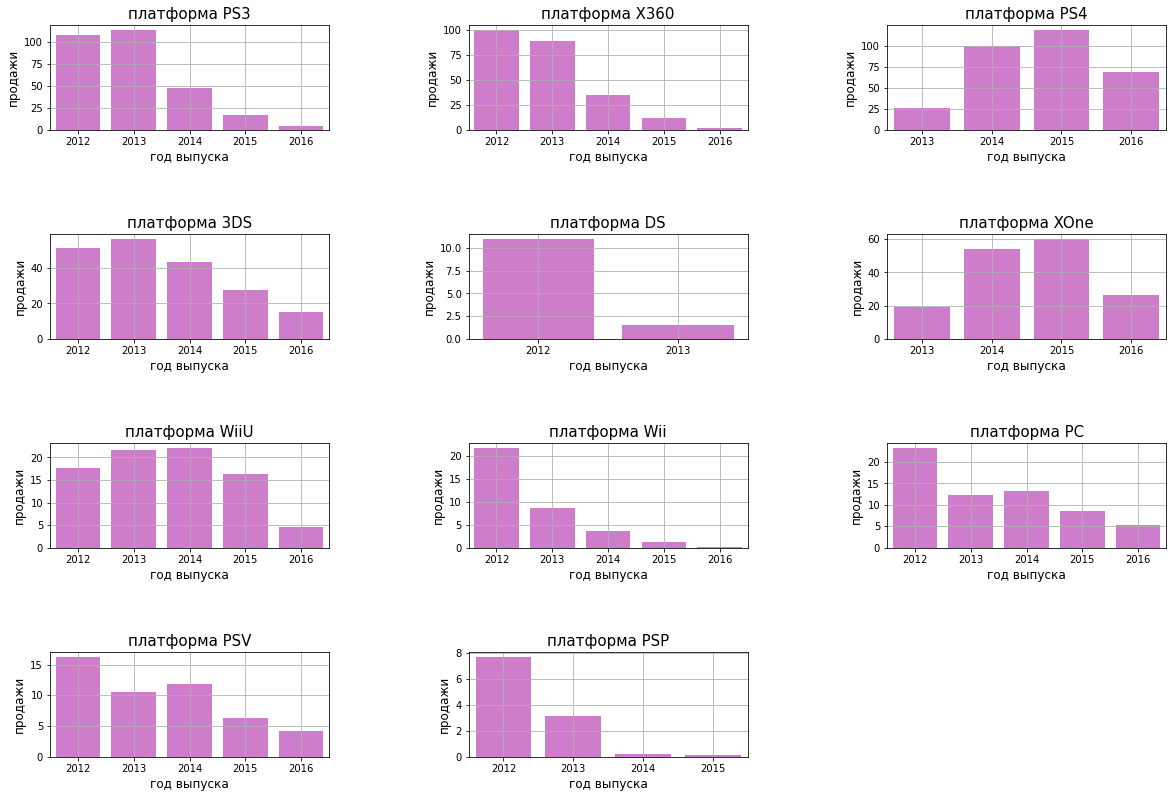

In [33]:
position = 0
plt.figure(figsize=[20,75])
plt.subplots_adjust(wspace=0.5, hspace=1.0)

for pl in data['platform'].unique():
    position += 1
    plt.subplot(20, 3, position)
    dt = data[data['platform'] == pl].pivot_table(index = 'year', values = 'all_sum', aggfunc = 'sum').reset_index()
    sns.barplot(x='year', y='all_sum', data=dt,color ='orchid')
    plt.grid(b=True)
    plt.title(f'платформа {pl}', fontsize=15);
    plt.xlabel('год выпуска', fontsize=12);
    plt.ylabel('продажи',fontsize=12);

#### Вывод
Наблюдается спад продаж у всех платформ. Но можно выделить платформы, которые пока еще перспективные. Это платформы: PS4, XOne, PC, PSV, WiiU.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

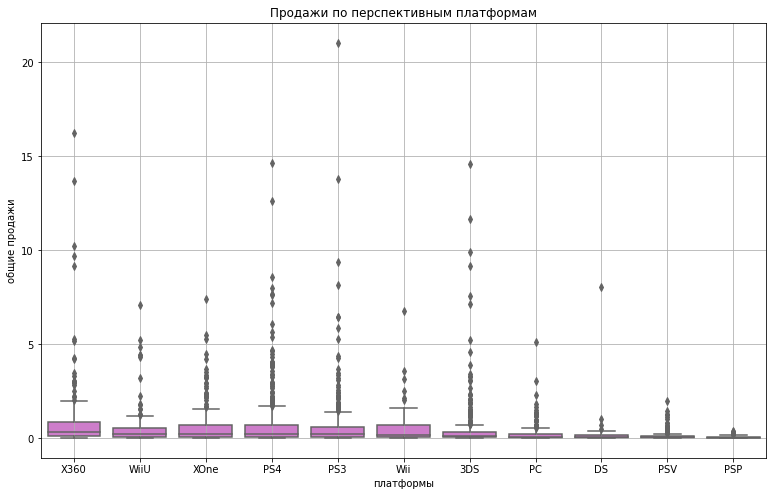

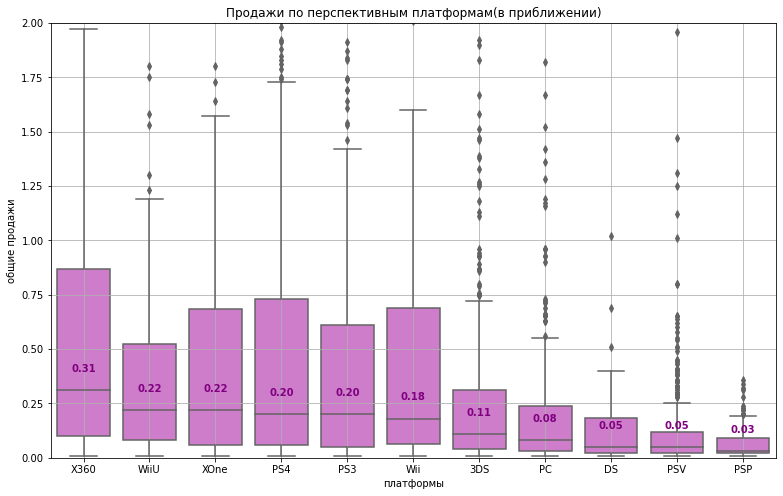

In [34]:
import seaborn as sns 

order=data.groupby('platform')['all_sum'].median().sort_values(ascending=False).index # сортируем по медианам

# Функция для добавления медиан на боксплот
def add_medians(ax, data, x, y, order, y_offset=0.1):
    for i, platform in enumerate(order):
        median = data[data[x] == platform][y].median()
        ax.text(i, median + y_offset, f'{median:.2f}', color='purple', ha='center', va='center', fontweight='bold')

plt.figure(figsize=(13, 8))
ax = sns.boxplot(data=data, y='all_sum', x='platform', order=order, color = 'orchid')
ax.set(title='Продажи по перспективным платформам', xlabel='платформы', ylabel='общие продажи')
ax.grid(True)
plt.show()

plt.figure(figsize=(13, 8))
ax = sns.boxplot(data=data, y='all_sum', x='platform', order=order, color = 'orchid')
ax.set(title='Продажи по перспективным платформам(в приближении)',xlabel='платформы', ylabel='общие продажи', ylim=(0, 2))
add_medians(ax, data, 'platform', 'all_sum', order)
ax.grid(True)
plt.show()

#### Вывод:
Исходя из boxplot следует:
1. Лучше всего продаются PS4, XOne, WiiU, PS3, X360, Wii.
2. Медианное значение у лидирующих платформ(п.1) выше остальных, что свидетельствует о стабильно больших продажах.



### Влияние на продажи игр в зависимости от отзывов пользователей и критиков для платформы PS4

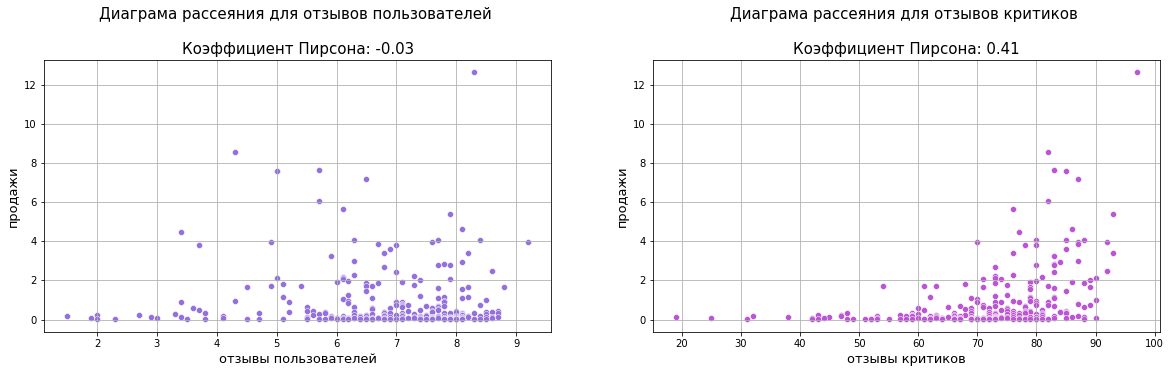

In [36]:
plt.figure(figsize=(20, 5))

df1 = data.query('platform == "PS4" & user_score != -1')
plt.subplot(1, 2, 1)
cor = df1['all_sum'].corr(df1['user_score'])
plt.title(f'Диаграма рассеяния для отзывов пользователей \n\nКоэффициент Пирсона: {cor:.2f}', fontsize=15)
sns.scatterplot(x='user_score', y='all_sum', data=df1, color = 'mediumpurple')
plt.ylabel('продажи', fontsize=13)
plt.xlabel('отзывы пользователей', fontsize=13)
plt.grid(True)

df2 = data.query('platform == "PS4" & critic_score != -1')
plt.subplot(1, 2, 2)
cor = df2['all_sum'].corr(df2['critic_score'])
plt.title(f'Диаграма рассеяния для отзывов критиков \n\nКоэффициент Пирсона: {cor:.2f}', fontsize=15)
sns.scatterplot(x='critic_score', y='all_sum', data=df2, color = 'mediumorchid')
plt.ylabel('продажи',fontsize=13)
plt.xlabel('отзывы критиков', fontsize=13)
plt.grid(True);

#### Вывод
Отзывы пользователей и критиков на продажи с пратформы PS4 оказывают незначительное влияние(это видно из коэффициента корреляции и диаграммы рассеивания). Больше влияние оказывают отзывы критиков.

### Влияние на продажи игр в зависимости от отзывов пользователей и критиков для других лидирующих платформ

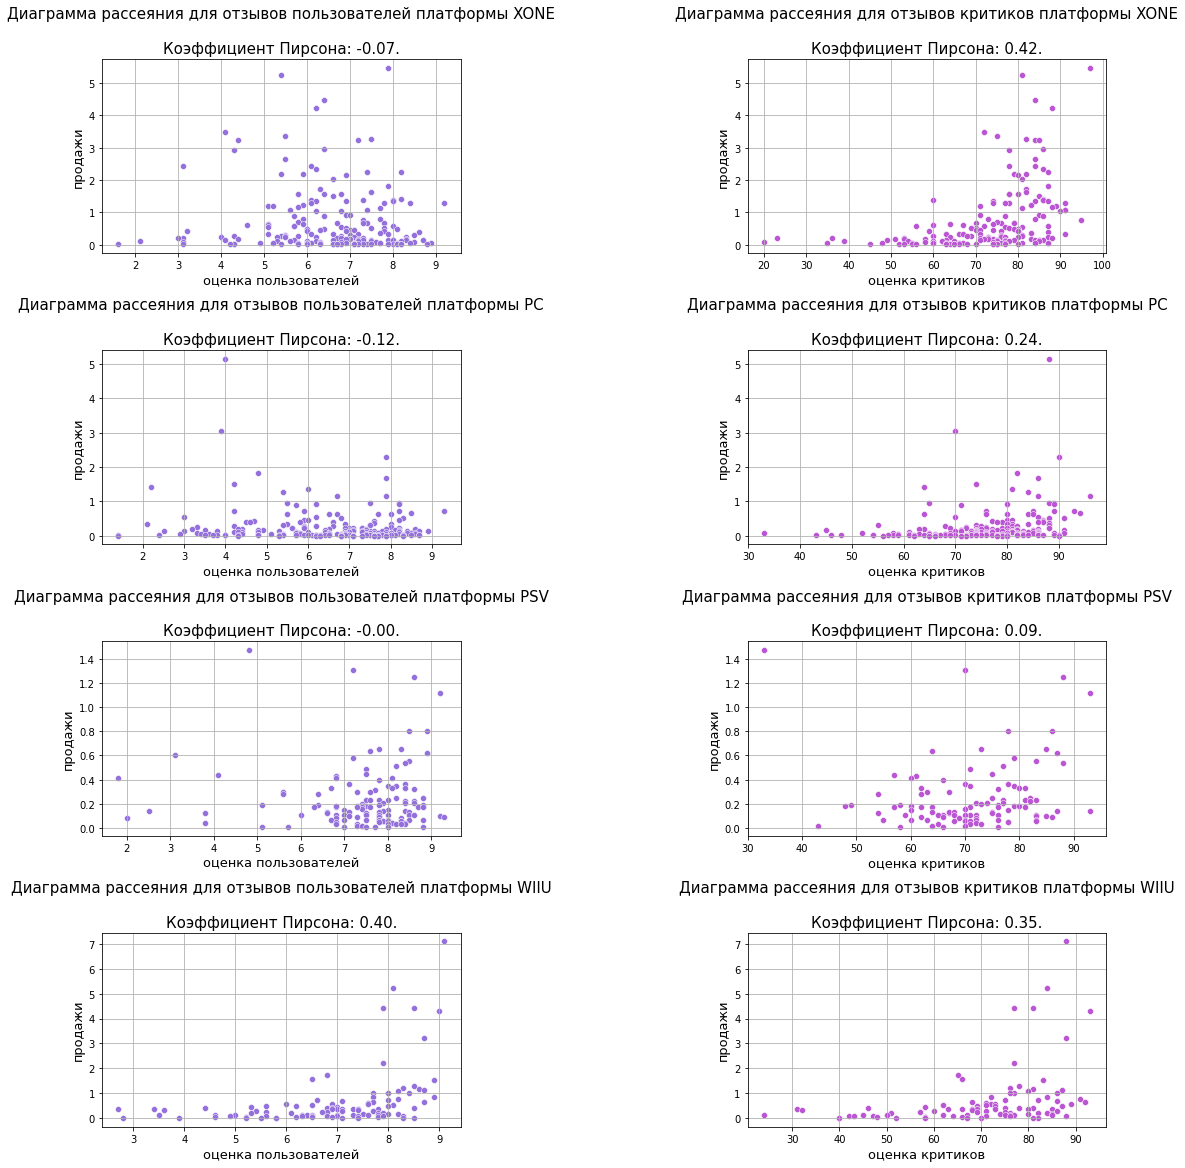

In [37]:
position = 0
plt.figure(figsize=[18,25])
plt.subplots_adjust(wspace=0.8, hspace=0.5)

list = ['XOne', 'PC', 'PSV', 'WiiU']

for name in list:
    position += 1
    
    df1 = data[(data['platform'] == name) & (data['user_score'] != -1)]
    plt.subplot(5, 2, position)
    cor = df1['all_sum'].corr(df1['user_score'])
    plt.title(f'Диаграмма рассеяния для отзывов пользователей платформы {name.upper()}\n\nКоэффициент Пирсона: {cor:.2f}.', fontsize=15)
    sns.scatterplot(x='user_score', y='all_sum', data=df1, color = 'mediumpurple' )
    plt.xlabel('оценка пользователей', fontsize=13)
    plt.ylabel('продажи', fontsize=13)
    plt.grid(True)
    
    position += 1
    df2 = data[(data['platform'] == name) & (data['critic_score'] != -1)]
    plt.subplot(5, 2, position)
    cor= df2['all_sum'].corr(df2['critic_score'])
    plt.title(f'Диаграмма рассеяния для отзывов критиков платформы {name.upper()}\n\nКоэффициент Пирсона: {cor:.2f}.', fontsize=15)
    sns.scatterplot(x='critic_score', y='all_sum', data=df2, color = 'mediumorchid')
    plt.xlabel('оценка критиков',fontsize=13 )
    plt.ylabel('продажи', fontsize=13)
    plt.grid(True);

#### Вывод
Для других платформ также характерно влияние мнения пользователей и критиков на продажи. Вклад оценки критиков в продажи преобладает над вкладом оценки пользователей, но их влияние слабое. Для платформы WiiU оценка пользователей ценится больше, чем критиков.

### Влияние вида жанра на продажи

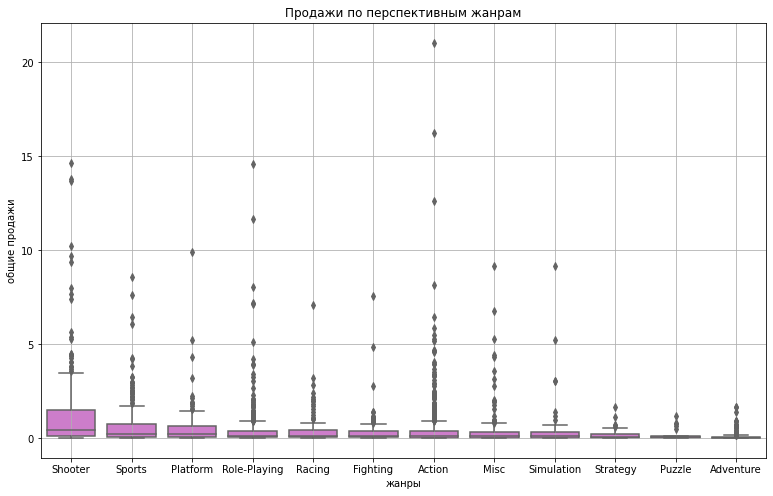

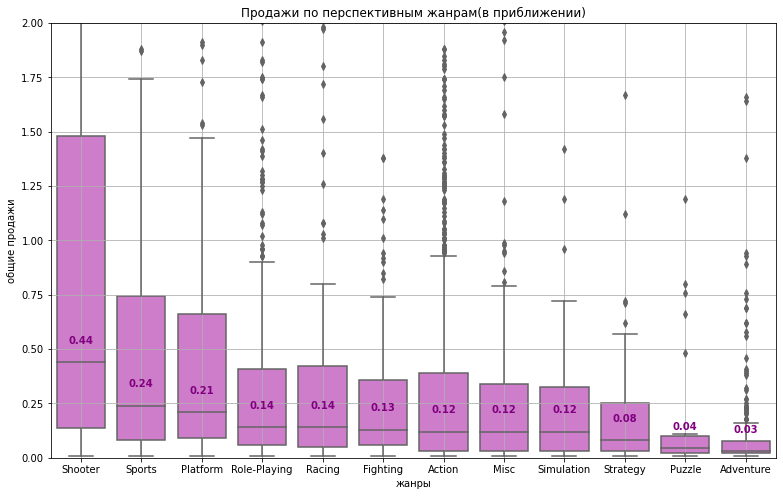

In [38]:
import seaborn as sns 

order=data_temp.groupby('genre')['all_sum'].median().sort_values(ascending=False).index # сортируем по медианам

# Функция для добавления медиан на боксплот
def add_medians(ax, data, x, y, order, y_offset=0.1):
    for i, platform in enumerate(order):
        median = data[data[x] == platform][y].median()
        ax.text(i, median + y_offset, f'{median:.2f}', color='purple', ha='center', va='center', fontweight='bold')

plt.figure(figsize=(13, 8))
ax = sns.boxplot(data=data, y='all_sum', x='genre', order=order, color = 'orchid')
ax.set(title='Продажи по перспективным жанрам', xlabel='жанры', ylabel='общие продажи')
ax.grid(True)
plt.show()

plt.figure(figsize=(13, 8))
ax = sns.boxplot(data=data, y='all_sum', x='genre', order=order, color = 'orchid')
ax.set(title='Продажи по перспективным жанрам(в приближении)',xlabel='жанры', ylabel='общие продажи', ylim=(0, 2))
add_medians(ax, data, 'genre', y, order)
ax.grid(True)
plt.show()

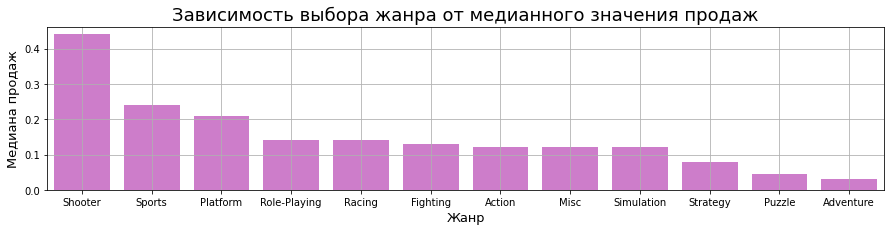

In [39]:
dt = data.pivot_table(index='genre', values='all_sum', aggfunc='median').sort_values(by='all_sum', ascending=False).reset_index()
plt.figure(figsize=(15, 3))
plt.title('Зависимость выбора жанра от медианного значения продаж', fontsize=18)
sns.barplot(x='genre', y='all_sum', data=dt, color = 'orchid')
plt.ylabel('Медиана продаж',fontsize= 13)
plt.xlabel('Жанр', fontsize=13)
plt.grid(True);

#### Вывод:
Лучше всего продается игра в жанре "Shooter", хуже всего  - "Adventure".
Наибольшую популярность имеют жанры: "shooter", "sports", "platform", "role-playing". У них наибольшее количество продаж с отрывом от остальных.
boxplot дополняет вывод о влиянии жанра на стоимость тем,что у наиболее популярных жанров наблюдается большой размах между минимум и максимум, что также свидетельствует о больших продажах.

### Вывод
Исследовательский анализ показал, что:
1. Критическая граница(снизу) по годам: 1995г. Наблюдается спад продаж после 2008 в связи мировым кризисом.
2. Платформы - лидеры по прадажам являются: 'PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS'. Поскольку необходимо определить с реднюю продолжительсть жизни - нужны платформы, коорые уже на начале этапа завершиения иоли уже своего жизненного цикла.
3. Средняя продолжительность жизни платформы составляет 11 лет.
4. Для анализа и прогнозирования на 2017 благоприятным периодам является период, начиная с 2012 г(полькольку средняя продолжительность жизни составляет 10.2 года)
5. Наблюдается спад продаж у всех платформ. Но можно выделить платформы, которые пока еще перспективные. Это флатформы: PS4, XOne, PC, PSV, WiiU.
6. Лучше всего продаются PS4, XOne, WiiU, у них больше всех медианное значение продах о стабильно больших продажах.
7. Для платформ характерно влияние мнения пользователей и критиков на продажи. Вклад оценки критиков в продажи преобладает над вкладом оценки пользователей,по влияние слабое.
8. Лучше всего продается игра в жанре "Shooter", хуже всего - "Adventure". Наибольшую прибыльность имеют жанры: "shooter", "sports", "platform", "role-playing".

## Составление портрета пользователя каждого региона
Портрет пользователя для каждого региона выявит сильные и слабые стороны платформ, что поможет для прогноза 2017 г.
Для выполнения поставленной задачи необходимо сделать:
1. Определить топ 5 популярных платформ в зависимости от региона.
2. Топ 5 жанров и есть ли различия в зависимости от страны пользователя.
3. Есть ли влияние рейтинга ESRB на продажи для регионов.

### Топ 5 популярных платформ в зависимости от региона.

In [40]:
data_na = data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales',ascending = False ).reset_index()
all_na = data_na['na_sales'].sum()
data_na['procent'] = (data_na['na_sales'] / all_na) * 100
data_na['plat_new'] = data_na['platform']
data_na['plat_new'] = data_na['plat_new'].where(data_na['procent'] > 7 ,'Other')

data_eu = data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales',ascending = False ).reset_index()
all_eu = data_eu['eu_sales'].sum()
data_eu['procent'] = (data_eu['eu_sales'] / all_eu) * 100
data_eu['plat_new'] = data_eu['platform']
data_eu['plat_new'] = data_eu['plat_new'].where(data_eu['procent'] > 8 ,'Other')


data_jp = data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales',ascending = False ).reset_index()
all_jp = data_jp['jp_sales'].sum()
data_jp['procent'] = (data_jp['jp_sales'] / all_jp) * 100
data_jp['plat_new'] = data_jp['platform']
data_jp['plat_new'] = data_jp['plat_new'].where(data_jp['procent'] > 6 ,'Other')

In [41]:
#display(data_jp)
data_na_new = data_na.pivot_table(index = 'plat_new', values = 'na_sales', aggfunc = 'sum')
data_eu_new = data_eu.pivot_table(index = 'plat_new', values = 'eu_sales', aggfunc = 'sum')
data_jp_new = data_jp.pivot_table(index = 'plat_new', values = 'jp_sales', aggfunc = 'sum')

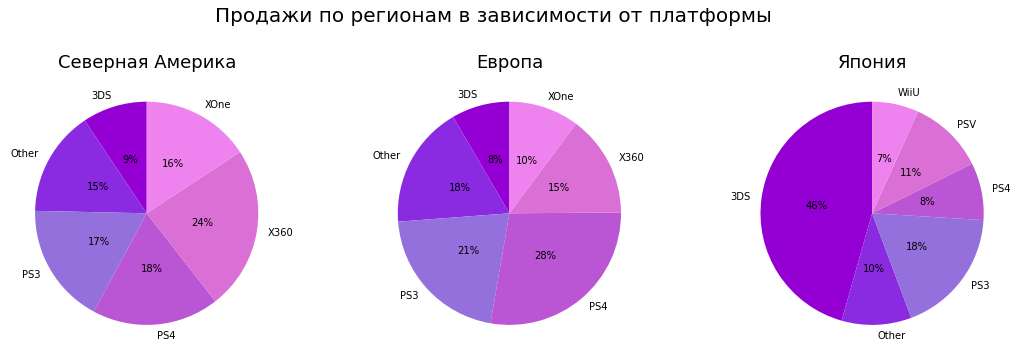

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Продажи по регионам в зависимости от платформы',  fontsize=20)

data_na_new.plot(kind = 'pie',
                 subplots=True,
                 autopct='%.0f%%',
                 colors=["darkviolet", 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid','violet'],
                 startangle=90, pctdistance=0.5,
                 ax=ax[0])
ax[0].set_title('Северная Америка',fontsize=18)
ax[0].set_ylabel('')
ax[0].legend().remove()

data_eu_new.plot(kind = 'pie',
                 subplots=True,
                 autopct='%.0f%%',
                 colors=["darkviolet", 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid','violet'],
                 startangle=90, pctdistance=0.5,
                 ax=ax[1])
ax[1].set_title('Европа', fontsize=18)
ax[1].set_ylabel("")
ax[1].legend().remove()

data_jp_new.plot(kind = 'pie',
                 subplots=True,
                 autopct='%.0f%%',
                 colors=["darkviolet", 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid','violet'],
                 startangle=90, pctdistance=0.5,
                 ax=ax[2])
ax[2].set_title('Япония',fontsize=18)
ax[2].set_ylabel("")
ax[2].legend().remove()

plt.ylabel('')
plt.subplots_adjust(wspace=0.3, hspace=0.80)
plt.show()

#### Вывод
Топ 5 популярных платформ в зависимости от региона:
1. Северная Америка: X360, PS4, PS3, XOne, 3DS. X360 имеет 24% от всех продаж игр Северной Америке.
2. Европа: PS4, PS3, X360, XOne, 3DS. PS4 имеет 28% от всех продаж игр в Европе.
3. Япония: 3DS, PS3, PSV, PS4, WiiU. 3DS имеет 46% от всех продаж игр в Японии.

### Топ 5 жанров в зависимости от региона.

In [43]:
data_na = data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales',ascending = False ).reset_index()
all_na = data_na['na_sales'].sum()
data_na['procent'] = (data_na['na_sales'] / all_na) * 100
data_na['genre_new'] = data_na['genre']
data_na['genre_new'] = data_na['genre_new'].where(data_na['procent'] > 5 ,'Other')

data_eu = data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales',ascending = False ).reset_index()
all_eu = data_eu['eu_sales'].sum()
data_eu['procent'] = (data_eu['eu_sales'] / all_eu) * 100
data_eu['genre_new'] = data_eu['genre']
data_eu['genre_new'] = data_eu['genre_new'].where(data_eu['procent'] > 5.20 ,'Other')

data_jp = data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales',ascending = False ).reset_index()
all_jp = data_jp['jp_sales'].sum()
data_jp['procent'] = (data_jp['jp_sales'] / all_jp) * 100
data_jp['genre_new'] = data_jp['genre']
data_jp['genre_new'] = data_jp['genre_new'].where(data_jp['procent'] > 4.8 ,'Other')

In [44]:
#display(data_jp)

In [45]:
data_na_new = data_na.pivot_table(index = 'genre_new', values = 'na_sales', aggfunc = 'sum')
data_eu_new = data_eu.pivot_table(index = 'genre_new', values = 'eu_sales', aggfunc = 'sum')
data_jp_new = data_jp.pivot_table(index = 'genre_new', values = 'jp_sales', aggfunc = 'sum')

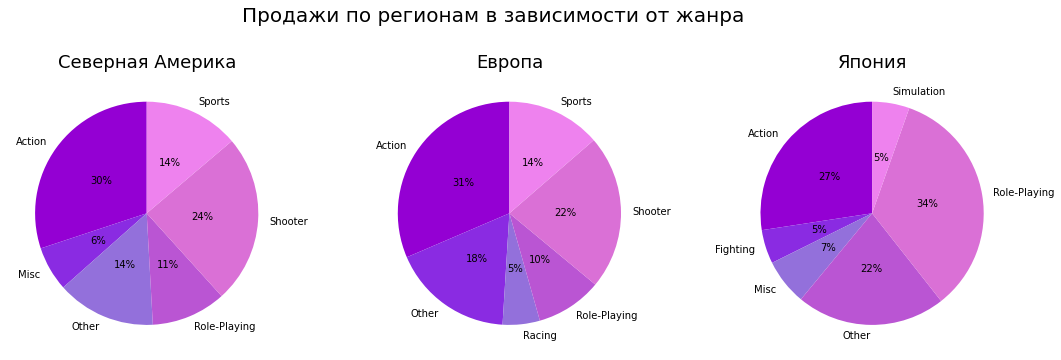

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Продажи по регионам в зависимости от жанра',  fontsize=20)

data_na_new.plot(kind = 'pie',
                 subplots=True,
                 autopct='%.0f%%',
                 colors=["darkviolet", 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid','violet'],
                 startangle=90, pctdistance=0.5,
                 ax=ax[0])
ax[0].set_title('Северная Америка',fontsize=18)
ax[0].set_ylabel('')
ax[0].legend().remove()

data_eu_new.plot(kind = 'pie',
                 subplots=True,
                 autopct='%.0f%%',
                 colors=["darkviolet", 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid','violet'],
                 startangle=90, pctdistance=0.5,
                 ax=ax[1])
ax[1].set_title('Европа', fontsize=18)
ax[1].set_ylabel("")
ax[1].legend().remove()

data_jp_new.plot(kind = 'pie',
                 subplots=True,
                 autopct='%.0f%%',
                 colors=["darkviolet", 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid','violet'],
                 startangle=90, pctdistance=0.5,
                 ax=ax[2])
ax[2].set_title('Япония',fontsize=18)
ax[2].set_ylabel("")
ax[2].legend().remove()

plt.ylabel('')
plt.subplots_adjust(wspace=0.3, hspace=0.80)
plt.show()

#### Вывод
Топ 5 популярных жанров в зависимости от региона:

Северная Америка: Action, Shooter, Sports, Role_Playing, Misc. Action имеет 30% от всех продаж игр Северной Америке.
Европа: Action, Shooter, Sports, Role_Playing, Racing. Action имеет 31% от всех продаж игр в Европе.
Япония: Role_Playing, Action, Misc, Simulation, Fighting. Role_Playing имеет 34% от всех продаж игр в Японии.

Разница в выборе жанра в разных регионах зависит в первую очередь от минталитета. Например, в Японии наблюдается популярный жанр Role_Playing. Это жанр игры, который базируется на игре по ролям, а поскольку большая часть населения увлекается анимэ культурой, соответсвенно этот жанр будет популярен( как часть культуры анимэ, например).

Но общее между топ жанров заключается в том, что в них входят жанры, которые, в приоритете, подразумевают игры в компании.

### Есть ли влияние рейтинга ESRB на продажи для регионов.

In [47]:
data_na_new = data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
data_eu_new = data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
data_jp_new = data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')

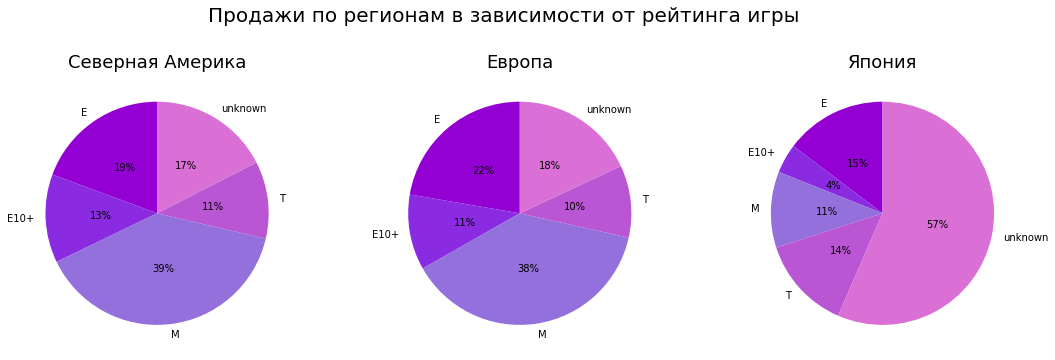

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Продажи по регионам в зависимости от рейтинга игры',  fontsize=20)

data_na_new.plot(kind = 'pie',
                 subplots=True,
                 autopct='%.0f%%',
                 colors=["darkviolet", 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid','violet'],
                 startangle=90, pctdistance=0.5,
                 ax=ax[0])
ax[0].set_title('Северная Америка',fontsize=18)
ax[0].set_ylabel('')
ax[0].legend().remove()

data_eu_new.plot(kind = 'pie',
                 subplots=True,
                 autopct='%.0f%%',
                 colors=["darkviolet", 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid','violet'],
                 startangle=90, pctdistance=0.5,
                 ax=ax[1])
ax[1].set_title('Европа', fontsize=18)
ax[1].set_ylabel("")
ax[1].legend().remove()

data_jp_new.plot(kind = 'pie',
                 subplots=True,
                 autopct='%.0f%%',
                 colors=["darkviolet", 'blueviolet', 'mediumpurple', 'mediumorchid', 'orchid','violet'],
                 startangle=90, pctdistance=0.5,
                 ax=ax[2])
ax[2].set_title('Япония',fontsize=18)
ax[2].set_ylabel("")
ax[2].legend().remove()

plt.ylabel('')
plt.subplots_adjust(wspace=0.3, hspace=0.80)
plt.show()

Расшифровка буквенных обозначений рейтинга:
- «E» («Everyone») — «Для всех» 
- «E10+»(«Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M»(«Mature») — «Для взрослых»
- «Unknown» — «Неопределенно»

#### Вывод
Исходя из представленных графиков видно, что распредение продаж в зависимости от рейтинга для Северной Америки и Европы одинаковы, кроме процентного соотношения. Большой процент имеют продажи, рейтинг которых не определен (в Японии занимает первое место). Для более точной картины, необходимы дополнения по рейтингам. 
В Северной Америке и Европе ппреобладают игры с рейтингом М. Меньше всего берут игры в жанре T и E10+.

### Вывод
Анализ продаж игр с учетом региона показал, что:

- Топ 5 популярных платформ в зависимости от региона:
  - Северная Америка: X360, PS4, PS3, XOne, 3DS. X360 имеет 24% от всех продаж игр Северной Америке.
  - Европа: PS4, PS3, X360, XOne, 3DS. PS4 имеет 28% от всех продаж игр в Европе.
  - Япония: 3DS, PS3, PSV, PS4, WiiU. 3DS имеет 46% от всех продаж игр в Японии.

- Топ 5 популярных жанров в зависимости от региона:
  - Северная Америка: Action, Shooter, Sports, Role_Playing, Misc. Action имеет 30% от всех продаж игр Северной Америке. 
  - Европа: Action, Shooter, Sports, Role_Playing, Racing. Action имеет 31% от всех продаж игр в Европе. 
  - Япония: Role_Playing, Action, Misc, Simulation, Fighting. Role_Playing имеет 34% от всех продаж игр в Японии.

- Разница в выборе жанра в разных регионах зависит от минталитета региона.

- Общее между топ жанров: жанры подразумевают игры в компании.

- Распредение продаж в зависимости от рейтинга для Северной Америки и Европы одинаковы, кроме процентного соотношения. 

- Большой процент имеют продажи, рейтинг которых не определен (в Японии занимает первое место). Для более точной картины, необходимы дополнения по рейтингам. 

- В Северной Америке и Европе ппреобладают игры с рейтингом М. Меньше всего берут игры в жанре T и E10+.

## Проверка гипотез
Для дальнейшего развития бинзеса необходимо проверить ряд гипотез:
1. Средние пользовательские рейтинги платформ XOne и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

### Гипотеза 1. Средние пользовательские рейтинги платформ XOne и PC одинаковые

Для проверки данной гипотезы воспользуемся t-критерием для подтверждения гипотезыо равенстве средних двух генеральных совокупностей.

Пороговое значение p-value = 0.05 (общепринятое)

Формулировка гипотезы:

- H0(нулевая гипотеза) - средние пользовательские рейтинги платформ XOne и PC одинаковые.

- H1(альтернативная гипотеза) - средние пользовательские рейтинги платформ XOne и PC разные.

Альтернативное решение такого вида было выбрано, поскольку интересует только наличия равенства.

In [49]:
alpha = 0.05

xone = data.query('platform == "XOne" & user_score != -1')
pc = data.query('platform == "PC" & user_score != -1')

results = st.ttest_ind(xone['user_score'], pc['user_score'])

print(f' p-value: {results.pvalue}')

if results.pvalue < alpha :
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Нет оснований отвергнуть нулевую гипотезу')
    
print('\nСреднее пользовательское для рейтинга платформы XOne: ', round(xone['user_score'].mean(),2))
print('Среднее пользовательское для рейтинга платформы PC: ', round(pc['user_score'].mean(),2))

 p-value: 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу

Среднее пользовательское для рейтинга платформы XOne:  6.52
Среднее пользовательское для рейтинга платформы PC:  6.43


#### Вывод
Проверка гипотезы показала, что пользовательские рейтинги для двух платформ XOne и PC одинаковы, это связано с хожестью игр данных платформ. Для наглядности было также расчитано среднее значение пользовательской оценки для платформы XOne = 6.52 и среднее значение пользовательской оценки для платформы PC = 6.43. Расчитанные показатели подтверждают гипотезу.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки данной гипотезы воспользуемся t-критерием для подтверждения гипотезы о равенстве средних двух генеральных совокупностей.

Пороговое значение p-value = 0.05 (общепринятое)

Формулировка гипотезы:

- H0(нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

- H1(альтернативная гипотеза) - средние пользовательские рейтинги платформ Action и Sports разные.

Альтернативное решение такого вида было выбрано, поскольку интересует только наличия равенства.


In [51]:
alpha = 0.05

action = data.query('genre == "Action" & user_score != -1')
sports = data.query('genre == "Sports" & user_score != -1')

results = st.ttest_ind(action['user_score'], sports['user_score'])

print(f' p-value: {results.pvalue}')

if results.pvalue < alpha :
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Нет оснований отвергнуть нулевую гипотезу')
    
print('Среднее пользовательское для рейтинга платформы  ')

print('\nСреднее пользовательское для рейтинга жанра Action: ', round(action['user_score'].mean(),2))
print('Среднее пользовательское для рейтинга жанра Sports: ', round(sports['user_score'].mean(),2))

 p-value: 4.8045233804629176e-26
Отвергаем нулевую гипотезу
Среднее пользовательское для рейтинга платформы  

Среднее пользовательское для рейтинга жанра Action:  6.83
Среднее пользовательское для рейтинга жанра Sports:  5.46


#### Вывод: 
Гипотеза 2 опровергла нулевую гипотезу, значит, пользовательские рейтинги жанров Action и Sports различаются.Для наглядности было также расчитано среднее значение пользовательской оценки для жанра Action = 6.83 и среднее значение пользовательской оценки жанра Sports = 5.46. Расчитанные показатели подтверждают гипотезу.

### Вывод
Формулировка гипотез строиться на двух частях: "Нулевая гипотеза" и "Альтернативная гипотеза". "Нулевая гипотеза" - это предположение о том, что нет различий между средними значениями двух выборок. "Альтернативная гмпотеза" - противоположное предположение о том, что существуют различия между средними значениями двух выборок. Для проверки гипотез для анализа в виде "Альтернативной гипотезы" использовалось неравентсво, поскольку не интересовало, улучшит или ухудшит по итогу результат. Для оценки данных гипотез был применен t-критерий для подтверждения гипотезы о равенстве средних двух генеральных совокупностей. Пороговое значение p-value = 0.05 (общепринятое)

Проверка гипотез показала, что:
1. пользовательские рейтинги для двух платформ XOne и PC одинаковы, это связано с хожестью игр данных платформ. Для наглядности было также расчитано среднее значение пользовательской оценки для платформы XOne = 6.52 и среднее значение пользовательской оценки для платформы PC = 6.42. Расчитанные показатели подтверждают гипотезу.
2. пользовательские рейтинги жанров Action и Sports различаются.Для наглядности было также расчитано среднее значение пользовательской оценки для жанра Action = 6.83 и среднее значение пользовательской оценки жанра Sports = 5.46. Расчитанные показатели подтверждают гипотезу.

## Вывод.

Цель данного проекта заключалась провести анаиз данных с целью определения потенциально выгодных продуктов и направлений для интернет-магазина "СТримчик".

Для решения поставленной задачи необходимо была проведена преобработка данных (для установления наличия/отсутсвия пропусков и дубликатов и их устранение, если это возможно), исследовательский анализ, анализ для разных регионов и проведена проверка ряда гипотез.

При преодобработке данных были выявлены пропуски в оценке критиков и пользоватлей и рейтинге.Большое количество пропусков в оценке критиков и оценке пользователей могут быть связаны с низкими продажами, что в последствии привело к нехватке отзывов для получения оценки. А пропуски в рейтинге могут быть обусловлены отсутсвием самого рейтинга и оценка по другому рейтингу.

Исследовательский анализ показал, что:
- Критическая граница(снизу) по годам: 1995г. Наблюдается спад продаж после 2008 в связи мировым кризисом.
- Платформы - лидеры по прадажам являются: 'PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS'.
- Средняя продолжительность жизни платформы составляет 11 лет.
- Для анализа и прогнозирования на 2017 благоприятным периодам является период, начиная с 2012 г
- Наблюдается спад продаж у всех платформ. Но можно выделить платформы, которые пока еще перспективные. Это флатформы: PS4, XOne, PC, PSV, WiiU.
- Лучше всего продаются PS4, XOne, WiiU, у них больше всех медианное значение продах.
- Для платформ характерно влияние мнения пользователей и критиков на продажи. Вклад оценки критиков в продажи преобладает над вкладом оценки пользователей, но их влияние слабое
- Лучше всего продается игра в жанре "Shooter", хуже всего - "Adventure". Наибольшую популярность имеют жанры: "shooter", "sports", "platform", "role-playing".

Анализ продаж игр с учетом региона показал, что:

- Топ 5 популярных платформ в зависимости от региона:
  - Северная Америка: X360, PS4, PS3, XOne, 3DS. X360 имеет 24% от всех продаж игр Северной Америке.
  - Европа: PS4, PS3, X360, XOne, 3DS. PS4 имеет 28% от всех продаж игр в Европе.
  - Япония: 3DS, PS3, PSV, PS4, WiiU. 3DS имеет 46% от всех продаж игр в Японии.
- Топ 5 популярных жанров в зависимости от региона:
  - Северная Америка: Action, Shooter, Sports, Role_Playing, Misc. Action имеет 30% от всех продаж игр Северной Америке.
  - Европа: Action, Shooter, Sports, Role_Playing, Racing. Action имеет 31% от всех продаж игр в Европе.
  - Япония: Role_Playing, Action, Misc, Simulation, Fighting. Role_Playing имеет 34% от всех продаж игр в Японии.
  - Разница в выборе жанра в разных регионах зависит от минталитета региона.
- Общее между топ жанров: жанры подразумевают игры в компании.
- Распредение продаж в зависимости от рейтинга для Северной Америки и Европы одинаковы, кроме процентного соотношения.
- Большой процент имеют продажи, рейтинг которых не определен (в Японии занимает первое место). Для более точной картины, необходимы дополнения по рейтингам.
- В Северной Америке и Европе ппреобладают игры с рейтингом М. Меньше всего берут игры в жанре T и E10+.

Проверка гипотез показала, что:

- пользовательские рейтинги для двух платформ XOne и PC одинаковы, это связано с хожестью игр данных платформ. Для наглядности было также расчитано среднее значение пользовательской оценки для платформы XOne = 6.52 и среднее значение пользовательской оценки для платформы PC = 6.42. Расчитанные показатели подтверждают гипотезу.
- пользовательские рейтинги жанров Action и Sports различаются.Для наглядности было также расчитано среднее значение пользовательской оценки для жанра Action = 6.83 и среднее значение пользовательской оценки жанра Sports = 5.46. Расчитанные показатели подтверждают гипотезу.
 
  
**Рекомендации по улучшению бизнеса.**

Далее будут приведены топ лучших показателей и этих показателей в зависимости от региона. На данные платформы и жанры необходимо сделать "ставку" в 2017г.

1. Самые пулярные жанры независимо от региоа: Action, Role_Playing.
2. Самые популярные платформы независимо от региона: PS4, PS3, 3DS.
3. Самые популярные рейтинги: E, T, M
4. На отзывы пользователей стоит обращать внимание при выборе жанра.

Для Северной Америки: 
- платформы: X360, PS4; 
- жанры: Action, Shooter; 
- рейтинг: M, E

Для Европы: 
- платформы:PS4, PS3;
- жанры: Action, Shooter;
- рейтинг: M, E

Для Японии: 
- платформы: PS3, PSV; 
- жанр:Role_Playing, Action;
- рейтинг: E, T